# Info
Name:  

    KORUS_cloud_aerosol_profile

Purpose:  

    Comparison of aerosol number and cloud profiles
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading ict and hdf5 files
    - matplotlib
    - numpy
    - scipy : for saving and reading
    - os
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - ...
  
Modification History:

    Written: Samuel LeBlanc, NASA Ames Research Center, 2018-08-16
    Modified: 

# Load the python modules and setup the environment

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import scipy.io as sio
import Sp_parameters as Sp
import tables
import load_utils as lm
from mpl_toolkits.basemap import Basemap,cm
from Sp_parameters import deriv, smooth
from path_utils import getpath
import hdf5storage as hs

In [2]:
%matplotlib notebook

In [3]:
fp = getpath('KORUS')
fp

u'/mnt/c/Users/sleblanc/Research/KORUS-AQ/'

# Load the files for plotting

## Load the merge files

In [4]:
mrg,mrg_info = lm.load_ict(fp+'data_other/korusaq-mrg01-dc8_merge_20160512_R4.ict',return_header=True)

('UTC', 'JDAY', 'INDEX', 'FLIGHT', 'LOCAL_SUN_TIME', 'LATITUDE', 'LONGITUDE', 'ALTP', 'PRESSURE', 'TEMPERATURE', 'THETA', 'O3COLUMN', 'SZA', 'WNS', 'WND', 'MSL_GPS_ALT', 'HAE_GPS_ALT', 'Radar_ALT', 'GRD_SPD', 'TAS', 'IAS', 'MachNumber', 'VerticalSpeed', 'HDG', 'TRK', 'DriftAngle', 'PITCH', 'ROLL', 'PotentialTemp_Hskping', 'Dewpoint', 'TotalAirTemp', 'IR_SurfTemp', 'CabinPressure', 'SolarZenithAngle', 'AircraftSunElevation', 'SunAzimuth', 'AircraftSunAzimuth', 'H2O_MixingRatio_Hskping', 'H2O_VaporPressure_Hskping', 'H2O_SatVaporPressureWater_Hskping', 'H2O_SatVaporPressureIce_Hskping', 'H2O_RelativeHumidity_Hskping', 'ProfileNumber', 'SiteNumber', 'MissedApproachNumber', 'H2O_MixingRatio_DLH', 'H2O_RelativeHumidityIce_DLH', 'H2O_RelativeHumidityWater_DLH', 'CO_MixingRatio', 'CH4_MixingRatio', 'N2O_MixingRatio', 'CO2_MixingRatio', 'CH2O_CAMS', 'C2H6_CAMS', 'NO2_KACES', 'CHOCHO_KACES', 'NO_MixingRatio', 'NOy_MixingRatio', 'NO2_MixingRatio', 'O3_MixingRatio', 'NO2_MixingRatio_LIF', 'PNs_Mi

In [5]:
mrg_info

['397, 1001\r\n',
 'Shook, Michael\r\n',
 'NASA Atmospheric Composition Branch, NASA Langley Research Center (SSAI)\r\n',
 'Merged data file for KORUS-AQ, Flight 08 (20160512), on the dc8 platform. Data is merged to 01 seconds.\r\n',
 'NASA KORUS-AQ Mission 2016\r\n',
 '1, 1\r\n',
 '2016, 05, 12, 2018, 02, 09\r\n',
 '01\r\n',
 'UTC,s\r\n',
 '354\r\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Load DIAL h5 data

In [6]:
val = (('AOT',0),('alt_prof',1),('cld_b',3),('cld_t',5),('cld_m',4),('ext532',19),('Alt',21),
       ('GPS_alt',24),('GPS_lat',25),('GPS_lon',26),('time',23))
dial,dial_info = lm.load_hdf(fp+'data_other/korusaq-DIAL_DC8_20160512_R1.h5',values=val)

Outputting the Data subdatasets:
0: [1x1552] //Data_Products/AOT (64-bit floating-point)
1: [2x1552] //Data_Products/AOT_alts (64-bit floating-point)
2: [678x1552] //Data_Products/Aerosol_ID_prfl (64-bit floating-point)
3: [4x1552] //Data_Products/Cloud_Bases (64-bit floating-point)
4: [678x1552] //Data_Products/Cloud_Mask_prfl (64-bit floating-point)
5: [4x1552] //Data_Products/Cloud_Tops (64-bit floating-point)
6: [678x1552] //Data_Products/Column_AOT_prfl (64-bit floating-point)
7: [678x1552] //Data_Products/O3_prfl (64-bit floating-point)
8: [678x1552] //Data_Products/Sa_532nm_prfl (64-bit floating-point)
9: [678x1552] //Data_Products/aerdep_1064nm_prfl (64-bit floating-point)
10: [678x1552] //Data_Products/aerdep_532nm_prfl (64-bit floating-point)
11: [678x1552] //Data_Products/bsc_1064nm_prfl (64-bit floating-point)
12: [678x1552] //Data_Products/bsc_532nm_prfl (64-bit floating-point)
13: [678x1552] //Data_Products/bsr_1064nm_prfl (64-bit floating-point)
14: [678x1552] //Data_Pro

In [7]:
dial['time'][0,280]/3600.0

23.771946614583332

In [8]:
dial_info['Alt']

{}

In [9]:
dial['cld_t'][:,280],dial['cld_b'][:,280]

(array([ 5336.08984375,            nan,            nan,            nan]),
 array([ nan,  nan,  nan,  nan]))

<IPython.core.display.Javascript object>


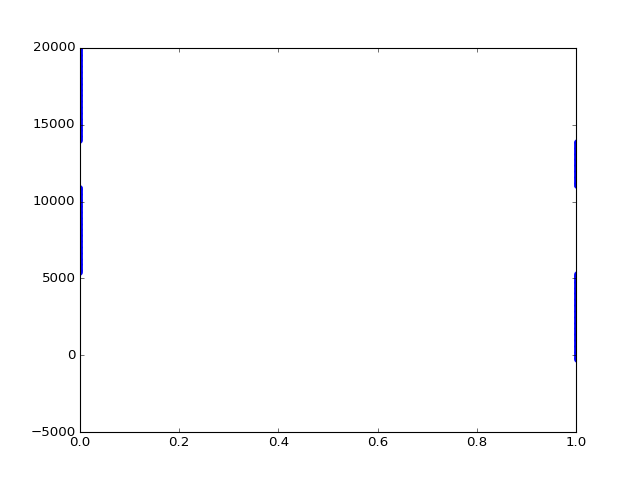

In [10]:
plt.figure()
plt.plot(dial['cld_m'][:,280],dial['Alt'],'.')

<IPython.core.display.Javascript object>


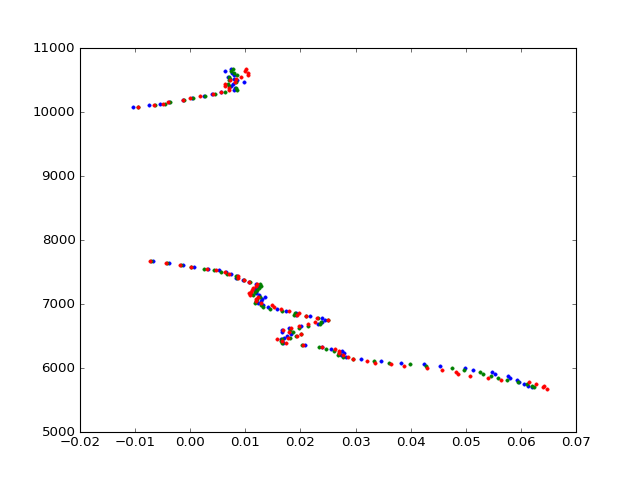

In [89]:
plt.figure()
plt.plot(dial['ext532'][:,273:276]+0.02,dial['Alt'],'.')

In [59]:
ic = 293

In [61]:
dial['cld_t'][:,280:300]

array([[ 5336.08984375,  5276.13134766,  5396.04785156,  5515.96484375,
         5396.04785156,  5426.02734375,  5276.13134766,  4976.33935547,
         5515.96484375,  5126.23535156,  5096.25585938,  4766.48486328,
         4496.671875  ,  4406.734375  ,  5246.15185547,  5336.08984375,
         5336.08984375,  4526.65136719,  4526.65136719,  4526.65136719],
       [           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,  5216.17285156,            nan,            nan,
         6535.2578125 ,  5276.13134766,  6505.27832031,  6445.31982422],
       [           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,       

In [54]:
dial['cld_t'][:,ic],dial['cld_b'][:,ic]

(array([ 5515.96484375,            nan,            nan,            nan]),
 array([ nan,  nan,  nan,  nan]))

<IPython.core.display.Javascript object>


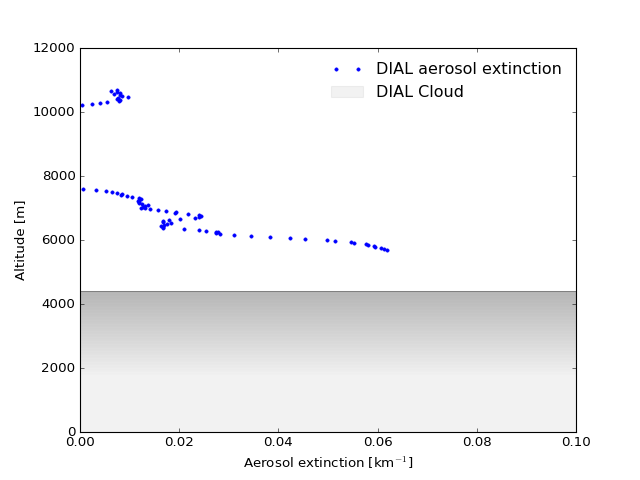

In [92]:
plt.figure()
plt.plot(dial['ext532'][:,273]+0.02,dial['Alt'],'.',label='DIAL aerosol extinction')
plt.axhspan(0.0,dial['cld_t'][0,293],color='grey',alpha=0.1,label='DIAL Cloud')

for i in xrange(1,100+1):
    top = dial['cld_t'][0,293]
    bot = dial['cld_t'][0,293]-dial['cld_t'][0,293]/100.0*(i-1)
    plt.axhspan(bot,top,color='grey',alpha=0.005-0.005/100.0*i)

#plt.axhspan(dial['cld_t'][0,293]*0.6,dial['cld_t'][0,293]*0.79,color='grey',alpha=0.15)
#plt.axhspan(dial['cld_t'][0,293]*0.4,dial['cld_t'][0,293]*0.59,color='grey',alpha=0.1)
#plt.axhspan(dial['cld_t'][0,293]*0.2,dial['cld_t'][0,293]*0.19,color='grey',alpha=0.05)
#plt.axhspan(0.0,dial['cld_t'][0,293]*0.19,color='grey',alpha=0.0)
plt.legend(frameon=False)
plt.xlim(0,0.1)
plt.xlabel('Aerosol extinction [km$^{{-1}}$]')
plt.ylabel('Altitude [m]')

## Load the MERRA-2 files

In [12]:
fpma = fp+'data_other/MERRA2/'

In [13]:
fpma

u'/mnt/c/Users/sleblanc/Research/KORUS-AQ/data_other/MERRA2/'

In [14]:
day = '20160512'

In [15]:
mcld,mcld_info = lm.load_netcdf(fpma+'MERRA2_400.tavg3_3d_cld_Nv.{}.SUB.nc'.format(day),everything=True)

Reading file: /mnt/c/Users/sleblanc/Research/KORUS-AQ/data_other/MERRA2/MERRA2_400.tavg3_3d_cld_Nv.20160512.SUB.nc
Outputting the Data subdatasets:
0: CFCU
1: CLOUD
2: DELP
3: DTRAIN
4: INCLOUDQI
5: INCLOUDQL
6: PS
7: QI
8: QL
9: RH
10: TAUCLI
11: TAUCLW
12: lat
13: lev
14: lon
15: time
['PS', 'DTRAIN', 'TAUCLI', 'TAUCLW', 'lon', 'lat', 'DELP', 'INCLOUDQL', 'time', 'lev', 'INCLOUDQI', 'QI', 'CFCU', 'RH', 'QL', 'CLOUD']


In [16]:
maero,maero_info = lm.load_netcdf(fpma+'MERRA2_400.inst3_3d_aer_Nv.{}.SUB.nc'.format(day),everything=True)

Reading file: /mnt/c/Users/sleblanc/Research/KORUS-AQ/data_other/MERRA2/MERRA2_400.inst3_3d_aer_Nv.20160512.SUB.nc
Outputting the Data subdatasets:
0: AIRDENS
1: BCPHILIC
2: BCPHOBIC
3: DELP
4: DMS
5: DU001
6: DU002
7: DU003
8: DU004
9: DU005
10: LWI
11: MSA
12: OCPHILIC
13: OCPHOBIC
14: PS
15: RH
16: SO2
17: SO4
18: SS001
19: SS002
20: SS003
21: SS004
22: SS005
23: lat
24: lev
25: lon
26: time
['DMS', 'MSA', 'PS', 'lon', 'DU004', 'DU005', 'DU002', 'DU003', 'DU001', 'RH', 'BCPHILIC', 'time', 'OCPHILIC', 'SO2', 'SO4', 'lev', 'lat', 'DELP', 'OCPHOBIC', 'LWI', 'BCPHOBIC', 'AIRDENS', 'SS003', 'SS002', 'SS001', 'SS005', 'SS004']


In [17]:
ll=[]
for k in maero_info.keys():
    print k,maero_info[k].long_name, maero_info[k].units
    if maero_info[k].units=='kg kg-1': ll.append(k)

DMS Dimethylsulphide kg kg-1
MSA Methanesulphonic acid kg kg-1
PS surface_pressure Pa
lon longitude degrees_east
DU004 Dust Mixing Ratio (bin 004) kg kg-1
DU005 Dust Mixing Ratio (bin 005) kg kg-1
DU002 Dust Mixing Ratio (bin 002) kg kg-1
DU003 Dust Mixing Ratio (bin 003) kg kg-1
DU001 Dust Mixing Ratio (bin 001) kg kg-1
RH relative_humidity_after_moist 1
BCPHILIC Hydrophilic Black Carbon kg kg-1
time time minutes since 2016-05-12 00:00:00
OCPHILIC Hydrophilic Organic Carbon (Particulate Matter) kg kg-1
SO2 Sulphur dioxide kg kg-1
SO4 Sulphate aerosol kg kg-1
lev vertical level layer
lat latitude degrees_north
DELP pressure_thickness Pa
OCPHOBIC Hydrophobic Organic Carbon (Particulate Matter) kg kg-1
LWI land(1)_water(0)_ice(2)_flag 1
BCPHOBIC Hydrophobic Black Carbon kg kg-1
AIRDENS air_density kg m-3
SS003 Sea Salt Mixing Ratio (bin 003) kg kg-1
SS002 Sea Salt Mixing Ratio (bin 002) kg kg-1
SS001 Sea Salt Mixing Ratio (bin 001) kg kg-1
SS005 Sea Salt Mixing Ratio (bin 005) kg kg-1
SS

In [18]:
ll

['DMS',
 'MSA',
 'DU004',
 'DU005',
 'DU002',
 'DU003',
 'DU001',
 'BCPHILIC',
 'OCPHILIC',
 'SO2',
 'SO4',
 'OCPHOBIC',
 'BCPHOBIC',
 'SS003',
 'SS002',
 'SS001',
 'SS005',
 'SS004']

In [19]:
maero['tot_aero'] = 0
for l in ll:
    maero['tot_aero'] = maero['tot_aero']+maero[l]

In [20]:
maero['scat'] = maero['tot_aero']*maero['AIRDENS']*1000.0*2.18*1000.0*1000.0

In [21]:
maero['scat'].shape

(8, 72, 17, 13)

In [22]:
matm,matm_info = lm.load_netcdf(fpma+'MERRA2_400.tavg3_3d_asm_Nv.{}.SUB.nc'.format(day),everything=True)

Reading file: /mnt/c/Users/sleblanc/Research/KORUS-AQ/data_other/MERRA2/MERRA2_400.tavg3_3d_asm_Nv.20160512.SUB.nc
Outputting the Data subdatasets:
0: CLOUD
1: DELP
2: EPV
3: H
4: O3
5: OMEGA
6: PHIS
7: PL
8: PS
9: QI
10: QL
11: QV
12: RH
13: SLP
14: T
15: U
16: V
17: lat
18: lev
19: lon
20: time
['PS', 'lat', 'time', 'QV', 'EPV', 'O3', 'V', 'SLP', 'T', 'lon', 'DELP', 'PHIS', 'PL', 'lev', 'H', 'QI', 'U', 'OMEGA', 'QL', 'CLOUD', 'RH']


In [23]:
matm['H'].shape

(8, 72, 17, 13)

In [24]:
matm['lat'].shape,matm['lon'].shape

((17,), (13,))

In [25]:
matm['time'][7]/60.0

21.0

In [19]:
mrg['LATITUDE'][ip][0],mrg['LONGITUDE'][ip][0]

NameError: name 'ip' is not defined

In [26]:
lat,lon = matm['lat'][7],matm['lon'][2]

In [27]:
maero['isaero'] = maero['scat']>50.0
mcld['iscld'] = mcld['QL']>0.00001

In [28]:
dz0 = (matm['H'][7,:,7,2][np.where(mcld['iscld'][7,:,7,2])[0][0]]+matm['H'][7,:,7,2][np.where(mcld['iscld'][7,:,7,2])[0][0]-1])/2.0
dz1 = (matm['H'][7,:,7,2][np.where(mcld['iscld'][7,:,7,2])[0][0]+1]+matm['H'][7,:,7,2][np.where(mcld['iscld'][7,:,7,2])[0][0]])/2.0

<IPython.core.display.Javascript object>


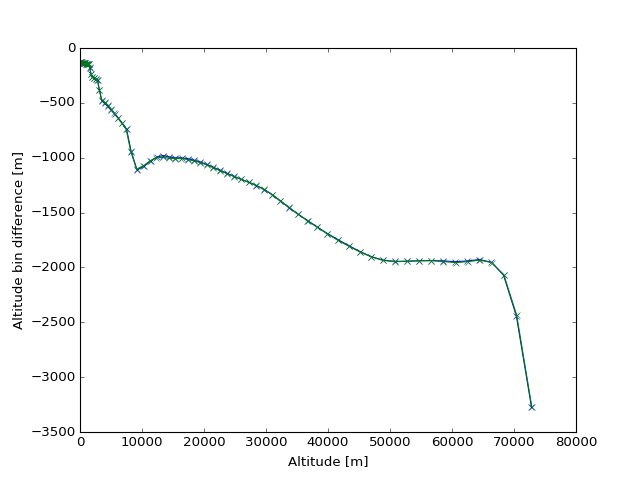

In [29]:
plt.figure()
plt.plot(matm['H'][7,1:,7,2],np.diff(matm['H'][7,:,7,2]),'x-')
plt.plot(matm['H'][7,1:,10,2],np.diff(matm['H'][7,:,10,2]),'x-')
plt.xlabel('Altitude [m]')
plt.ylabel('Altitude bin difference [m]')

In [32]:
ilow = matm['H'][7,1:,7,2]<7000.0
iloww = matm['H'][7,1:,7,2]<3000.0

In [33]:
np.nanmean(np.diff(matm['H'][7,:,7,2])[ilow]),np.nanmean(np.diff(matm['H'][7,:,7,2])[iloww])

(-297.96521, -179.81804)

In [34]:
np.diff(matm['H'][7,:,7,2])[ilow]

array([-687.59326172, -641.04443359, -600.99804688, -565.12597656,
       -532.86865234, -503.87060547, -478.59838867, -382.1237793 ,
       -293.24462891, -284.35058594, -276.296875  , -268.6875    ,
       -235.50805664, -178.40966797, -149.3067627 , -146.55395508,
       -144.02258301, -141.99133301, -139.9453125 , -137.92987061,
       -136.15228271, -134.21234131, -132.19110107, -130.17932129,
       -127.92453003], dtype=float32)

<IPython.core.display.Javascript object>


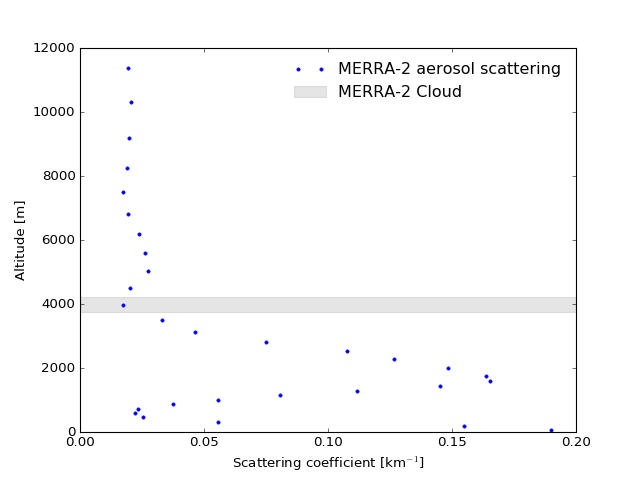

In [35]:
plt.figure()
plt.plot(maero['scat'][7,:,7,2]/1000.0,matm['H'][7,:,7,2],'.',label='MERRA-2 aerosol scattering')
plt.axhspan(dz0,dz1,color='grey',alpha=0.2,label='MERRA-2 Cloud')
plt.ylim(0,12000)
plt.legend(frameon=False)
plt.xlabel('Scattering coefficient [km$^{{-1}}$]')
plt.ylabel('Altitude [m]')

# Plot some data

<IPython.core.display.Javascript object>


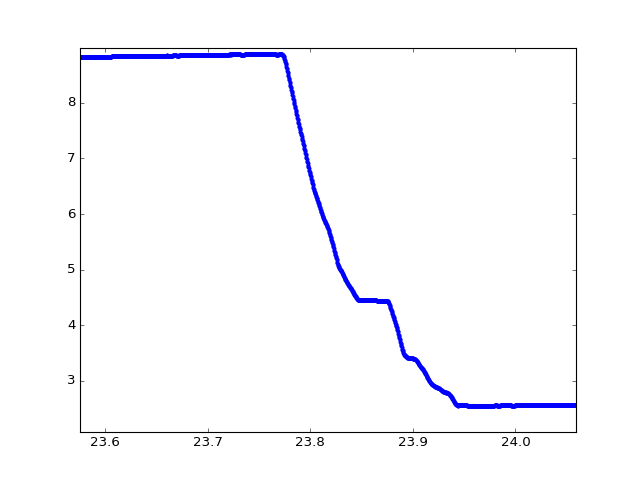

In [23]:
plt.figure()
plt.plot(mrg['UTC'],mrg['HAE_GPS_ALT'],'.')

In [93]:
ip = (mrg['UTC']>23.75)&(mrg['UTC']<23.94)

<IPython.core.display.Javascript object>


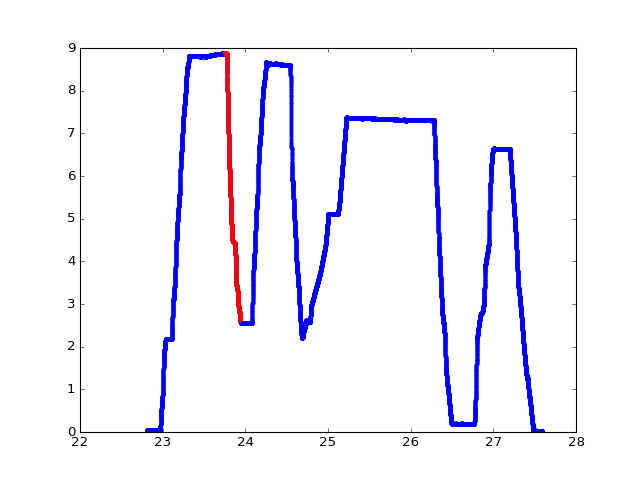

In [25]:
plt.figure()
plt.plot(mrg['UTC'],mrg['HAE_GPS_ALT'],'.')
plt.plot(mrg['UTC'][ip],mrg['HAE_GPS_ALT'][ip],'r.')

<IPython.core.display.Javascript object>


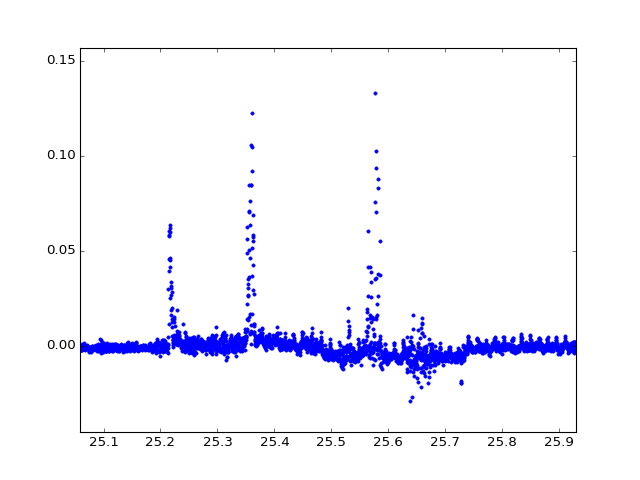

In [21]:
plt.figure()
plt.plot(mrg['UTC'],mrg['CWC'],'.')

<IPython.core.display.Javascript object>


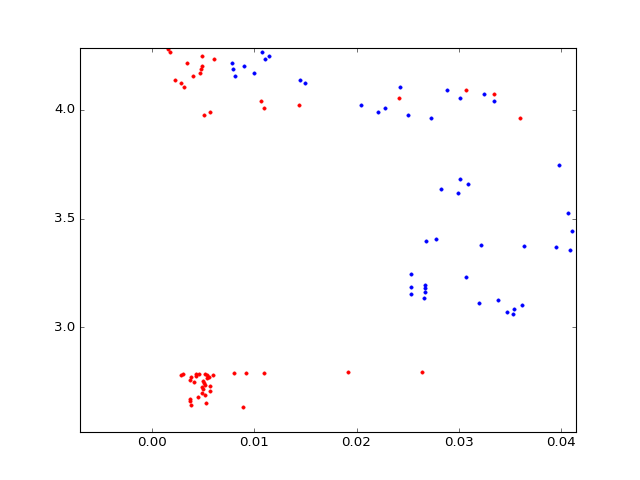

In [26]:
plt.figure()
plt.plot(mrg['SCAT550nmamb_total_stdPT_LARGE'][ip]/1000.0,mrg['HAE_GPS_ALT'][ip],'.')
plt.plot(mrg['CWC'][ip],mrg['HAE_GPS_ALT'][ip],'r.')

In [94]:
mrg['HAE_GPS_ALT'][ip][np.where(mrg['CWC'][ip]>0.01)[0][0]]

4.0890000000000004

<IPython.core.display.Javascript object>


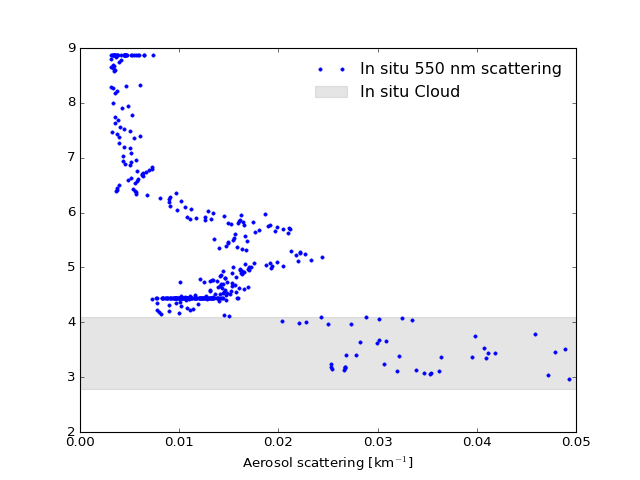

(0, 0.05)

In [95]:
plt.figure()
plt.plot(mrg['SCAT550nmamb_total_stdPT_LARGE'][ip]/1000.0,mrg['HAE_GPS_ALT'][ip],'.',label='In situ 550 nm scattering')
plt.axhspan(mrg['HAE_GPS_ALT'][ip][np.where(mrg['CWC'][ip]>0.01)[0][-1]],
             mrg['HAE_GPS_ALT'][ip][np.where(mrg['CWC'][ip]>0.01)[0][0]],color='grey',alpha=0.2,label='In situ Cloud')
plt.legend(frameon=False)
plt.xlabel('Aerosol scattering [km$^{{-1}}$]')
plt.xlim(0,0.05)

In [58]:
mrg['LATITUDE'][ip][0],mrg['LONGITUDE'][ip][0]

(35.52066284, 124.28508979999999)

## Combine plots

<IPython.core.display.Javascript object>


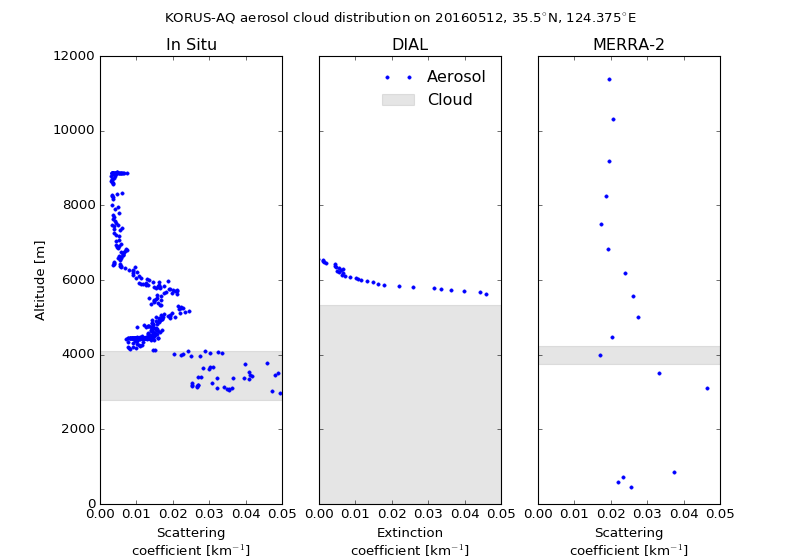

In [96]:
plt.figure(figsize=(10,7))
ax1 = plt.subplot(1,3,1)

plt.plot(mrg['SCAT550nmamb_total_stdPT_LARGE'][ip]/1000.0,mrg['HAE_GPS_ALT'][ip]*1000.0,'.',label='In situ 550 nm scattering')
plt.axhspan(mrg['HAE_GPS_ALT'][ip][np.where(mrg['CWC'][ip]>0.01)[0][-1]]*1000.0,
             mrg['HAE_GPS_ALT'][ip][np.where(mrg['CWC'][ip]>0.01)[0][0]]*1000.0,color='grey',alpha=0.2,label='In situ Cloud')
#plt.legend(frameon=False)
plt.xlabel('Scattering\ncoefficient [km$^{{-1}}$]')
plt.xlim(0,0.05)
plt.ylabel('Altitude [m]')
plt.title('In Situ')

ax2 = plt.subplot(1,3,2,sharey=ax1)
plt.plot(dial['ext532'][:,280],dial['Alt'],'.',label='Aerosol')
plt.axhspan(0.0,dial['cld_t'][0,280],color='grey',alpha=0.2,label='Cloud')
plt.legend(frameon=False)
plt.xlim(0,0.05)
plt.xlabel('Extinction\ncoefficient [km$^{{-1}}$]')
plt.title('DIAL')
#plt.ylabel('Altitude [m]')
plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = plt.subplot(1,3,3,sharey=ax1)
plt.plot(maero['scat'][7,:,7,2]/1000.0,matm['H'][7,:,7,2],'.',label='MERRA-2 aerosol scattering')
plt.axhspan(dz0,dz1,color='grey',alpha=0.2,label='MERRA-2 Cloud')
plt.ylim(0,12000)
#plt.legend(frameon=False)
plt.xlim(0,0.05)
plt.xlabel('Scattering\ncoefficient [km$^{{-1}}$]')
plt.title('MERRA-2')
plt.setp(ax3.get_yticklabels(), visible=False)
#plt.ylabel('Altitude [m]')
plt.suptitle('KORUS-AQ aerosol cloud distribution on {}, {}$^{{\circ}}$N, {}$^{{\circ}}$E'.format(day,lat,lon))
plt.savefig(fpma+'KORUS_aerosol_cloud_insitu_dial_merra_{}.png'.format(day),transparent=True,di=600)

<IPython.core.display.Javascript object>


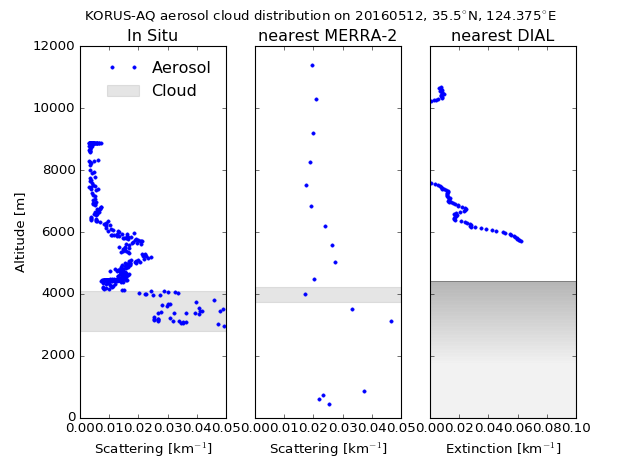

In [106]:
plt.figure(figsize=(8,5.8))
ax1 = plt.subplot(1,3,1)

plt.plot(mrg['SCAT550nmamb_total_stdPT_LARGE'][ip]/1000.0,mrg['HAE_GPS_ALT'][ip]*1000.0,'.',label='Aerosol')
plt.axhspan(mrg['HAE_GPS_ALT'][ip][np.where(mrg['CWC'][ip]>0.01)[0][-1]]*1000.0,
             mrg['HAE_GPS_ALT'][ip][np.where(mrg['CWC'][ip]>0.01)[0][0]]*1000.0,color='grey',alpha=0.2,label='Cloud')
plt.legend(frameon=False)
plt.xlabel('Scattering [km$^{{-1}}$]')
plt.xlim(0,0.05)
plt.ylabel('Altitude [m]')
plt.title('In Situ')

ax2 = plt.subplot(1,3,3,sharey=ax1)
plt.plot(dial['ext532'][:,273]+0.02,dial['Alt'],'.',label='Aerosol')
plt.axhspan(0.0,dial['cld_t'][0,293],color='grey',alpha=0.1,label='Cloud')

for i in xrange(1,100+1):
    top = dial['cld_t'][0,293]
    bot = dial['cld_t'][0,293]-dial['cld_t'][0,293]/100.0*(i-1)
    plt.axhspan(bot,top,color='grey',alpha=0.005-0.005/100.0*i)
#plt.legend(frameon=False)
plt.xlim(0,0.1)
plt.xlabel('Extinction [km$^{{-1}}$]')
plt.title('nearest DIAL')
#plt.ylabel('Altitude [m]')
plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = plt.subplot(1,3,2,sharey=ax1)
plt.plot(maero['scat'][7,:,7,2]/1000.0,matm['H'][7,:,7,2],'.',label='Aerosol')
plt.axhspan(dz0,dz1,color='grey',alpha=0.2,label='Cloud')
plt.ylim(0,12000)
#plt.legend(frameon=False)
plt.xlim(0,0.05)
plt.xlabel('Scattering [km$^{{-1}}$]')
plt.title('nearest MERRA-2')
plt.setp(ax3.get_yticklabels(), visible=False)
#plt.ylabel('Altitude [m]')
plt.suptitle('KORUS-AQ aerosol cloud distribution on {}, {}$^{{\circ}}$N, {}$^{{\circ}}$E'.format(day,lat,lon))
plt.savefig(fpma+'KORUS_aerosol_cloud_insitu_dial_merra_{}_v2.png'.format(day),transparent=True,di=600)